# Objectives
YWBAT
* list the assumptions of Linear Regression
* describe how to measure the assumptions of Linear Regression
* describe why multicollinearity is bad 
    * in terms of mathematics
    * in terms of the real world
* describe the purpose of linear regression


# Outline
* Setup a scenario
* Discuss the process of creating a linear regression model
    * go through the assumptions of linear regression

# Scenario
You're given some dataset with features `(f1, ..., fn)`and you are tasked with making a linear regression model that can estimate a target `y`.  

In [5]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import scipy.stats as scs
import statsmodels.api as sm

from sklearn.datasets import make_regression

import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
X, y = make_regression(n_samples=5000, n_features=10, n_informative=7, noise=4.0)
df = pd.DataFrame(data=X, columns=[f'feature_{i}' for i in range(1, 11)])
df['target'] = y
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,-1.084952,0.210075,-0.569886,-2.151319,1.962795,0.682032,0.476988,-0.897910,0.113228,0.943084,-43.864099
1,-0.826281,1.697189,0.719323,-1.915959,-0.659142,0.179833,1.465273,-0.795925,0.381501,-0.201474,-7.797254
2,0.255873,-0.561481,-0.077602,-0.007927,1.344070,-0.198345,-1.587575,-0.473752,-0.519099,1.132834,-130.929426
3,0.030157,1.829582,-0.473768,-0.505341,-0.640867,-0.381878,-0.856654,0.389740,1.649450,0.700798,101.101590
4,-1.283212,0.218180,-0.251211,2.610192,-0.645696,0.462676,-1.468523,-0.260887,0.138181,0.108413,-49.171134


# In Linear Regression what is the formula that we use to predict the target, y_hat
linear algebra lowercase = vectors, scalars (some real number)

linear algebra uppercase = matrix


$$ \hat{y} = \beta_0f_0 + \beta_1f_1 + \beta_2f_2 + ... + \beta_n f_n$$

what is $\beta_0$ 
- the intercept
- the coefficient when x_vec = 1
- it's the value of $\hat{y}$ when all features = 0
- offset
- bias

In [43]:
# goal is to make a column of 1s
X_with_bias = sm.add_constant(X)
df_with_bias = pd.DataFrame(data=X_with_bias, columns=[f'feature_{i}' for i in range(0, 11)])
df_with_bias['target'] = y
df_with_bias.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,1.0,-1.084952,0.210075,-0.569886,-2.151319,1.962795,0.682032,0.476988,-0.897910,0.113228,0.943084,-43.864099
1,1.0,-0.826281,1.697189,0.719323,-1.915959,-0.659142,0.179833,1.465273,-0.795925,0.381501,-0.201474,-7.797254
2,1.0,0.255873,-0.561481,-0.077602,-0.007927,1.344070,-0.198345,-1.587575,-0.473752,-0.519099,1.132834,-130.929426
3,1.0,0.030157,1.829582,-0.473768,-0.505341,-0.640867,-0.381878,-0.856654,0.389740,1.649450,0.700798,101.101590
4,1.0,-1.283212,0.218180,-0.251211,2.610192,-0.645696,0.462676,-1.468523,-0.260887,0.138181,0.108413,-49.171134


# Let's break down the math of what is happening row by row

$\hat{y}$ is a vector

$\hat{y} = X\vec{\beta}$


In order to solve this for $\beta$ I need to know $(X^TX)^{-1}$

But not all inverses exist! 

In Linear Regression
* Multicollinearity will cause $(X^TX)$ to not have an inverse


Multicollinearity
* When a column (feature) can be predicted by the other columns (features) of the dataset

# Garbage In = Garbage Out

# What do we do if we have multicollinearity? 
* you can drop the column that is not linearly indepedent
* or you can make a new feature with that column combined with the other features and use that instead.
    * the 'other features' are the ones that can predict the column in question
* feature engineering - one of the most important things you can do as a data scientist

# let's do some modeling

In [44]:
def plot_corr(df):
    corr = df.corr().abs()
    plt.figure(figsize=(8, 5))
    sns.heatmap(corr, fmt='0.2g', annot=True, cmap=sns.color_palette('Blues'))
    plt.show()
    
    
# VIF test is a great test for multicollinearity
def calculate_vif(df, target_col, show_res=False):
    x = df.drop(columns=[target_col])
    y = df[target_col]
    ols = sm.OLS(y, x).fit()
    if show_res:
        display(ols.summary())
    vif = 1 / (1 - ols.rsquared)
    return vif

In [45]:
for col in df.drop(columns=['target']).columns:
    vif = calculate_vif(df=df.drop(columns=['target']), target_col=col, show_res=True)
    print(f"{col} has vif of {vif}")
    break

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              feature_1   R-squared (uncentered):                   0.001
Model:                            OLS   Adj. R-squared (uncentered):             -0.001
Method:                 Least Squares   F-statistic:                             0.6010
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                       0.797
Time:                        14:18:07   Log-Likelihood:                         -7065.5
No. Observations:                5000   AIC:                                  1.415e+04
Df Residuals:                    4991   BIC:                                  1.421e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature_2     -0.0128      0.014     -0.913      0.361      -0.040       0.015
feature_3     -0.0041      0.014     -0.295      0.768      -0.032       0.023
feature_4      0.0037      0.014      0.264      0.792      -0.024       0.032
feature_5     -0.0259      0.014     -1.875      0.061      -0.053       0.001
feature_6      0.0045      0.014      0.325      0.746      -0.023       0.032
feature_7     -0.0091      0.014     -0.644      0.520      -0.037       0.019
feature_8     -0.0038      0.014     -0.271      0.786      -0.031       0.024
feature_9      0.0041      0.014      0.288      0.773      -0.024       0.032
feature_10     0.0081      0.014      0.577      0.564      -0.019       0.036
==============================================================================
Omnibus:                        6.431   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                5.674
Skew:                           0.019   Prob(JB):                       0.0586
Kurtosis:                       2.839   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

feature_1 has vif of 1.0010837787908229


# Assumptions of Linear Regression
* that the features are linearly related to the target
* residuals have to be normally distributed
* residuals should not have autocorrelation (there shouldn't be a pattern)
    * homoskedasticity
    * standard deviation is independent of inputs and outputs
    * blob not cone
* no multicollinearity in feature space

# let's build a model and plot our residuals

In [46]:
def build_ols(df, target='target', add_constant=False):
    X = df.drop(columns=[target])
    if add_constant:
        X = sm.add_constant(X)
    y = df[target]
    ols = sm.OLS(y, X).fit()
    display(ols.summary())
    return ols

In [47]:
ols = build_ols(df)

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          4.990e+05
Date:                Tue, 29 Sep 2020   Prob (F-statistic):                        0.00
Time:                        14:18:08   Log-Likelihood:                         -14093.
No. Observations:                5000   AIC:                                  2.821e+04
Df Residuals:                    4990   BIC:                                  2.827e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
feature_1     20.2720      0.058    351.166      0.000      20.159      20.385
feature_2     -0.0359      0.057     -0.629      0.529      -0.148       0.076
feature_3      0.0583      0.057      1.021      0.307      -0.054       0.170
feature_4      8.6130      0.058    148.921      0.000       8.500       8.726
feature_5      8.3075      0.056    147.443      0.000       8.197       8.418
feature_6     46.2817      0.057    813.275      0.000      46.170      46.393
feature_7     36.0430      0.058    625.259      0.000      35.930      36.156
feature_8     79.2815      0.058   1378.794      0.000      79.169      79.394
feature_9     82.0825      0.058   1415.635      0.000      81.969      82.196
feature_10     0.0367      0.057      0.641      0.521      -0.075       0.149
==============================================================================
Omnibus:                        1.267   Durbin-Watson:                   2.044
Prob(Omnibus):                  0.531   Jarque-Bera (JB):                1.291
Skew:                          -0.017   Prob(JB):                        0.525
Kurtosis:                       2.929   Cond. No.                         1.08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

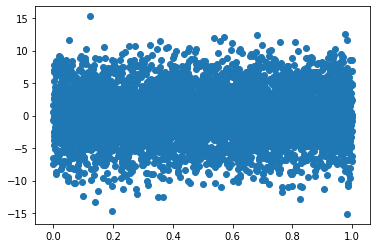

In [48]:
# plot residuals
residuals = ols.resid
x_axis = np.linspace(0, 1, len(residuals))

plt.scatter(x_axis, residuals)
plt.show()

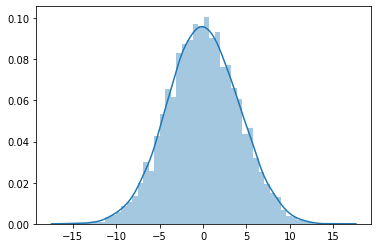

In [49]:
sns.distplot(residuals)
plt.show()

In [51]:
# How can we test that our residuals are normal? 
# H0: data is normal
# HA: data is not normal
scs.shapiro(residuals)

# p = 0.87 -> fail to reject the null, therefore residuals are normally distributed 

(0.9997599124908447, 0.870354950428009)

# Big Takeaways
* Multicollinearity is bad because it makes feature space garbage
    * why garbage? it makes it impossible to find an inverse of (X^TX)
* How do we measure Multicollinearity? VIF (high VIF is bad)
    * 1 / (1 - r2)
* What has to be true about residuals? 
    * normally distributed
    * blobby (heteroskeda....)